In [2]:
# from IPython.display import Image, display

# Display the image
display(Image(filename='delivery.png'))


NameError: name 'Image' is not defined

# Amazon Delivery Analysis

This notebook explores and analyzes delivery time data with the goal of improving delivery efficiency. The data includes information on orders, agents, locations, times, and external factors such as weather and traffic conditions.


## Business Problem

In the competitive world of e-commerce, timely delivery is crucial for customer satisfaction and retention. This project aims to analyze delivery times and identify key factors contributing to delays. By understanding these factors, the company can make informed decisions to enhance delivery efficiency and improve overall customer satisfaction.
The source of the data set is from https://www.kaggle.com/datasets/sujalsuthar/amazon-delivery-dataset

## Data Overview

The dataset contains information on approximately 43,739 delivery orders. It includes the following 16 columns:
- `Order ID`: Unique identifier for each order
- `Agent Age`: Age of the delivery agent
- `Agent Rating`: Performance rating of the delivery agent
- `Store Latitude/Longitude`: Geographic location of the store
- `Drop Latitude/Longitude`: Geographic location of the delivery destination
- `Order Time`: Timestamp of when the order was placed
- `Pickup Time`: Timestamp of when the order was picked up
- `Delivery Time`: Timestamp of when the order was delivered
- `Weather`: Weather conditions during delivery
- `Traffic`: Traffic conditions during delivery
- `Vehicle`: Type of vehicle used for delivery
- `Area`: Urban or rural area designation
- `Category`: Type of items in the order (e.g., electronics, groceries)

The data will be analyzed to uncover patterns and insights that could help reduce delivery times and improve operational efficiency.


In [3]:
!pip install matplotlib seaborn


In [4]:
!pip install importlib_resources


In [5]:
!pip install scikit-learn


In [6]:
#Importing Pandas and numpy Librbary 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

In [9]:
# Importing the data

df = pd.read_csv('amazon_delivery.csv')

In [10]:
# understanging the Data framework = 43,739 Rows and 16 colummns
df.shape

(43739, 16)

In [11]:
# Undertsanding the column_names
df.head(16)

,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category
0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing
1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics
2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports
3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics
4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys
5,fxuu788413734,22,4.8,17.431668,78.408321,17.461668,78.438321,2022-03-11,21:20:00,21:30:00,Cloudy,Jam,motorcycle,Urban,130,Toys
6,njmo150975311,33,4.7,23.369746,85.339820,23.479746,85.449820,2022-03-04,19:15:00,19:30:00,Fog,Jam,scooter,Metropolitian,200,Toys
7,jvjc772545076,35,4.6,12.352058,76.606650,12.482058,76.736650,2022-03-14,17:25:00,17:30:00,Cloudy,Medium,motorcycle,Metropolitian,160,Snacks
8,uaeb808891380,22,4.8,17.433809,78.386744,17.563809,78.516744,2022-03-20,20:55:00,21:05:00,Stormy,Jam,motorcycle,Metropolitian,170,Electronics
9,bgvc052754213,36,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55:00,22:10:00,Fog,Jam,motorcycle,Metropolitian,230,Toys


In [12]:
# Data types
df.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Store_Latitude',
       'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude', 'Order_Date',
       'Order_Time', 'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area',
       'Delivery_Time', 'Category'],
      dtype='object')

In [13]:
# We want a count of Null values in the data set

df.isnull().sum()

Order_ID            0
Agent_Age           0
Agent_Rating       54
Store_Latitude      0
Store_Longitude     0
Drop_Latitude       0
Drop_Longitude      0
Order_Date          0
Order_Time          0
Pickup_Time         0
Weather            91
Traffic             0
Vehicle             0
Area                0
Delivery_Time       0
Category            0
dtype: int64

In [16]:
# Convert Order_Time and Pickup_Time to datetime, then to time only
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S', errors='coerce').dt.time
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S', errors='coerce').dt.time

# Convert Delivery_Time from seconds to minutes and seconds
df['Delivery_Time_Minutes'] = df['Delivery_Time'] // 60
df['Delivery_Time_Seconds'] = df['Delivery_Time'] % 60

# Create a combined Delivery_Time column in the format MM:SS
df['Delivery_Time_Formatted'] = df['Delivery_Time_Minutes'].astype(str) + ':' + df['Delivery_Time_Seconds'].astype(str).str.zfill(2)

# Drop rows where any column has NaN or NaT values
df_cleaned = df.dropna()

# Display the cleaned DataFrame
print(df_cleaned)


            Order_ID  Agent_Age  Agent_Rating  Store_Latitude  \
0      ialx566343618         37           4.9       22.745049   
1      akqg208421122         34           4.5       12.913041   
2      njpu434582536         23           4.4       12.914264   
3      rjto796129700         38           4.7       11.003669   
4      zguw716275638         32           4.6       12.972793   
...              ...        ...           ...             ...   
43734  jlxf819993117         30           4.8       26.902328   
43735  aevx342135787         21           4.6        0.000000   
43736  xnek760674819         30           4.9       13.022394   
43737  cynl434665991         20           4.7       11.001753   
43738  nsyz997960170         23           4.9       23.351058   

       Store_Longitude  Drop_Latitude  Drop_Longitude  Order_Date Order_Time  \
0            75.892471      22.765049       75.912471  2022-03-19   11:30:00   
1            77.683237      13.043041       77.813237  2022

In [17]:
# We want a count of Null values in the data set after amendments

df_cleaned.isna().sum()

Order_ID                   0
Agent_Age                  0
Agent_Rating               0
Store_Latitude             0
Store_Longitude            0
Drop_Latitude              0
Drop_Longitude             0
Order_Date                 0
Order_Time                 0
Pickup_Time                0
Weather                    0
Traffic                    0
Vehicle                    0
Area                       0
Delivery_Time              0
Category                   0
Delivery_Time_Minutes      0
Delivery_Time_Seconds      0
Delivery_Time_Formatted    0
dtype: int64

In [18]:

# Convert Order_Time and Pickup_Time to datetime format
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format='%H:%M:%S')
df['Pickup_Time'] = pd.to_datetime(df['Pickup_Time'], format='%H:%M:%S')

# Handle midnight crossing
df['Time_Difference'] = df['Pickup_Time'] - df['Order_Time']

# Add 1 day to the pickup time if the difference is negative (i.e., crossing midnight)
df.loc[df['Time_Difference'] < pd.Timedelta(0), 'Time_Difference'] += pd.Timedelta(days=1)

# Convert the Time_Difference to minutes
df['Time_Difference_Minutes'] = df['Time_Difference'].dt.total_seconds() / 60

# Convert Order_Time and Pickup_Time back to string format to remove the year, showing only the time
df['Order_Time'] = df['Order_Time'].dt.strftime('%H:%M:%S')
df['Pickup_Time'] = df['Pickup_Time'].dt.strftime('%H:%M:%S')

# Sort by Time_Difference_Minutes in descending order
df_sorted = df.sort_values(by='Time_Difference_Minutes', ascending=False)

top_rows = df_sorted[['Order_Time', 'Pickup_Time', 'Time_Difference', 'Time_Difference_Minutes']].head(10)
print(top_rows)



      Order_Time Pickup_Time Time_Difference  Time_Difference_Minutes
0       11:30:00    11:45:00 0 days 00:15:00                     15.0
21876   21:50:00    22:05:00 0 days 00:15:00                     15.0
21893   23:20:00    23:35:00 0 days 00:15:00                     15.0
21889   19:25:00    19:40:00 0 days 00:15:00                     15.0
21884   20:30:00    20:45:00 0 days 00:15:00                     15.0
21883   22:45:00    23:00:00 0 days 00:15:00                     15.0
21882   23:35:00    23:50:00 0 days 00:15:00                     15.0
21881   15:30:00    15:45:00 0 days 00:15:00                     15.0
21879   22:45:00    23:00:00 0 days 00:15:00                     15.0
21877   22:55:00    23:10:00 0 days 00:15:00                     15.0


In [19]:
# understanding the statistical information about the data
df_cleaned.describe()

,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Delivery_Time,Delivery_Time_Minutes,Delivery_Time_Seconds
count,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000,43594.000000
mean,29.555719,4.635287,17.244769,70.768898,17.461540,70.832489,124.916433,1.637863,26.644653
std,5.760689,0.313827,7.690005,21.128773,7.338199,21.128940,51.941975,0.907988,16.585245
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,10.000000,0.000000,0.000000
25%,25.000000,4.500000,12.933298,73.170283,12.986054,73.280000,90.000000,1.000000,15.000000
50%,30.000000,4.700000,18.554382,75.898497,18.633934,76.002471,125.000000,2.000000,25.000000
75%,35.000000,4.900000,22.732225,78.045359,22.785049,78.102309,160.000000,2.000000,40.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,270.000000,4.000000,55.000000


In [20]:
# Checking for Duplictes throught the columns

df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
43734    False
43735    False
43736    False
43737    False
43738    False
Length: 43739, dtype: bool

In [21]:
#Checking for Duplicates Order_id

df.duplicated(subset =['Order_ID',])

0        False
1        False
2        False
3        False
4        False
         ...  
43734    False
43735    False
43736    False
43737    False
43738    False
Length: 43739, dtype: bool

In [22]:
# Group by Year and Month and count occurrences

# Convert 'Order_Date' to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

df['Order_Date'].dt.to_period('M').value_counts().sort_index()

2022-02     6982
2022-03    30658
2022-04     6099
Freq: M, Name: Order_Date, dtype: int64

In [23]:
# Category count to establish how many were sold for each category

df["Category"].value_counts()

Electronics     2849
Books           2824
Jewelry         2802
Toys            2781
Skincare        2772
Snacks          2770
Outdoors        2747
Apparel         2726
Sports          2719
Grocery         2691
Pet Supplies    2690
Home            2685
Cosmetics       2677
Kitchen         2673
Clothing        2667
Shoes           2666
Name: Category, dtype: int64

In [24]:
# Count occurrences of each vehicle type
vehicle_counts = df_cleaned['Vehicle'].value_counts()

# Display the counts
print(vehicle_counts)


motorcycle     25486
scooter        14590
van             3518
Name: Vehicle, dtype: int64


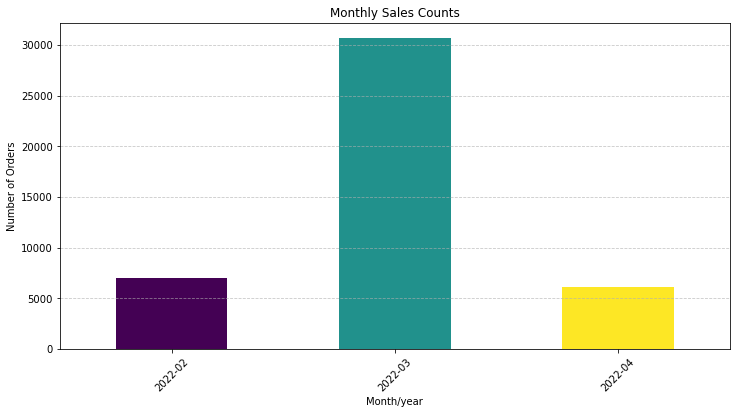

In [25]:
# Group by Year-Month and count occurrences
monthly_counts = df['Order_Date'].dt.to_period('M').value_counts().sort_index()

# Convert the dictionary to a Pandas Series
monthly_counts_series = pd.Series(monthly_counts)

# Generate a list of colors
num_bars = len(monthly_counts_series)
colors = cm.viridis(np.linspace(0, 1, num_bars))  # Using the 'viridis' colormap

# Plot the data as a bar chart with different colors
plt.figure(figsize=(12, 6))
monthly_counts_series.plot(kind='bar', color=colors)
plt.title('Monthly Sales Counts')
plt.xlabel('Month/year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


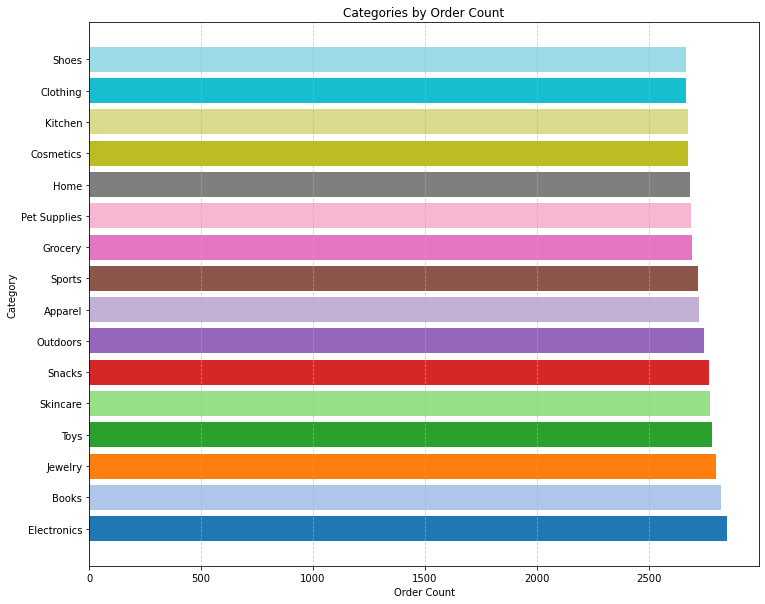

In [26]:
# Count the number of orders by category
df_category_order_count = df_sorted['Category'].value_counts().reset_index()
df_category_order_count.columns = ['Category', 'Order_Count']

# Set the number of categories
num_categories = len(df_category_order_count['Category'].unique())

# Generate a list of colors for each category
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, num_categories))

# Create a color dictionary to map each category to a color
color_dict = dict(zip(df_category_order_count['Category'].unique(), colors))

# Plot the data as a horizontal bar chart with different colors for each category
plt.figure(figsize=(12, 10))
bars = plt.barh(df_category_order_count['Category'], df_category_order_count['Order_Count'], 
                color=[color_dict[cat] for cat in df_category_order_count['Category']])

# Add labels and title
plt.title('Categories by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

   

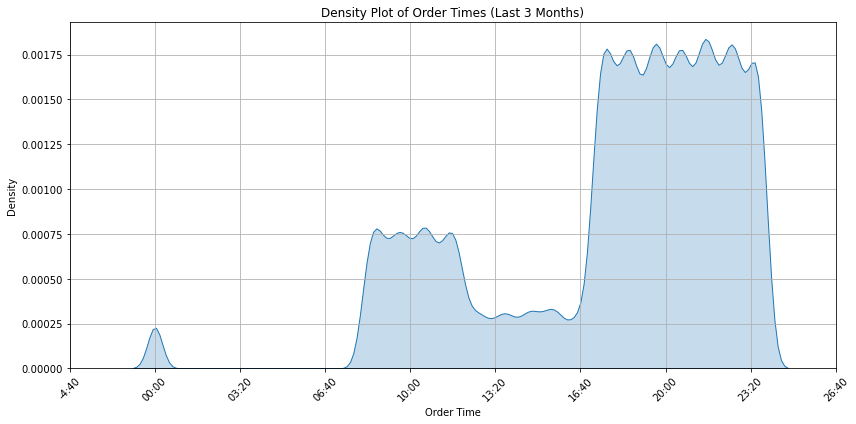

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure you have the correct DataFrame
df = df_cleaned.copy()  # Make a copy to avoid warnings

# Convert 'Order_Date' to datetime format using .loc
df.loc[:, 'Order_Date'] = pd.to_datetime(df['Order_Date'])

# Filter data for the last 3 months
end_date = df['Order_Date'].max()
start_date = end_date - pd.DateOffset(months=3)
df_filtered = df[(df['Order_Date'] >= start_date) & (df['Order_Date'] <= end_date)]

# Convert 'Order_Time' to datetime format and then to minutes since midnight using .loc
df_filtered.loc[:, 'Order_Time'] = pd.to_datetime(df_filtered['Order_Time'], format='%H:%M:%S').dt.time
df_filtered.loc[:, 'Order_Time_Minutes'] = df_filtered['Order_Time'].apply(lambda x: x.hour * 60 + x.minute)

# Plot Density Plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df_filtered['Order_Time_Minutes'], bw_adjust=0.5, fill=True)
plt.title('Density Plot of Order Times (Last 3 Months)')
plt.xlabel('Order Time')
plt.ylabel('Density')

# Convert minutes since midnight to HH:MM format for x-axis
xticks = plt.gca().get_xticks()
xtick_labels = [f'{int(minute // 60):02}:{int(minute % 60):02}' for minute in xticks]
plt.xticks(ticks=xticks, labels=xtick_labels, rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


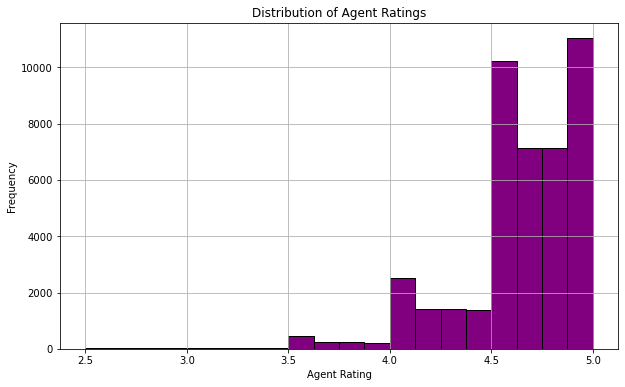

In [28]:

plt.figure(figsize=(10, 6))
plt.hist(df['Agent_Rating'], bins=20, color='purple', edgecolor='black')
plt.title('Distribution of Agent Ratings')
plt.xlabel('Agent Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


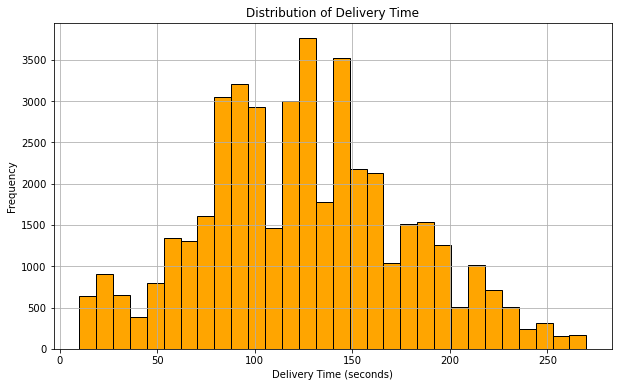

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(df['Delivery_Time'], bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



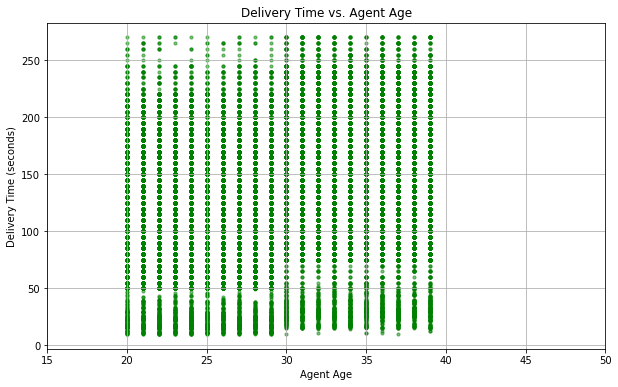

In [30]:
# Plot Delivery Time vs. Agent Age
plt.figure(figsize=(10, 6))

# Scatter plot with increased marker size
plt.scatter(df_cleaned['Agent_Age'], df_cleaned['Delivery_Time'], alpha=0.5, color='green', s=10)

# Set title and labels
plt.title('Delivery Time vs. Agent Age')
plt.xlabel('Agent Age')
plt.ylabel('Delivery Time (seconds)')

# Set x-axis limits to cover the age range from 15 to 50
plt.xlim(15, 50)

# Add grid
plt.grid(True)

# Show plot
plt.show()



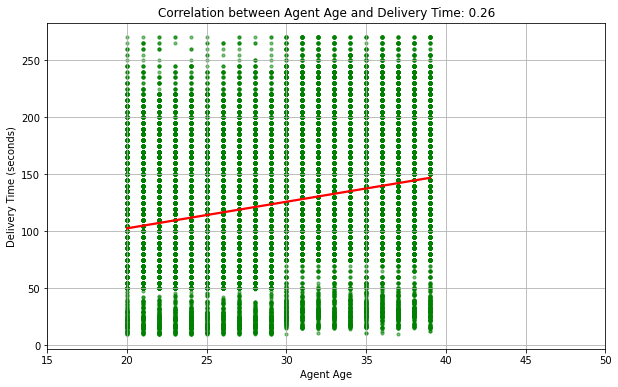

In [32]:
# Calculate the correlation coefficient
correlation_coefficient = df_cleaned['Agent_Age'].corr(df_cleaned['Delivery_Time'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Agent_Age', y='Delivery_Time', data=df_cleaned, scatter_kws={'alpha':0.5, 'color':'green', 's':10}, line_kws={'color':'red'})

# Set title and labels
plt.title(f'Correlation between Agent Age and Delivery Time: {correlation_coefficient:.2f}')
plt.xlabel('Agent Age')
plt.ylabel('Delivery Time (seconds)')

# Set x-axis limits to cover the age range from 15 to 50
plt.xlim(15, 50)

# Add grid
plt.grid(True)

# Show plot
plt.show()

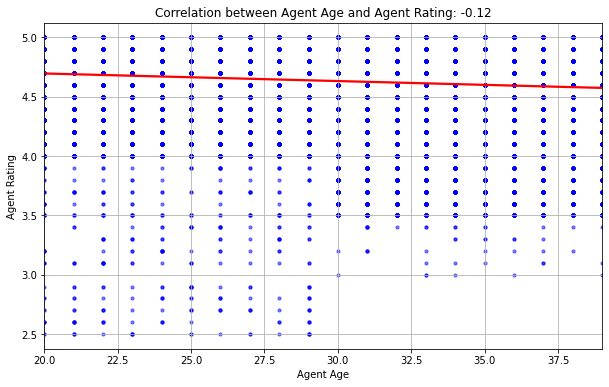

In [33]:
# Calculate the correlation coefficient between Agent Age and Agent Rating
correlation_age_rating = df_cleaned['Agent_Age'].corr(df_cleaned['Agent_Rating'])

# Set the figure size
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Agent_Age', y='Agent_Rating', data=df_cleaned, scatter_kws={'alpha':0.5, 'color':'blue', 's':10}, line_kws={'color':'red'})

# Set title and labels
plt.title(f'Correlation between Agent Age and Agent Rating: {correlation_age_rating:.2f}')
plt.xlabel('Agent Age')
plt.ylabel('Agent Rating')

# Set x-axis limits (if needed)
plt.xlim(df_cleaned['Agent_Age'].min(), df_cleaned['Agent_Age'].max())

# Add grid
plt.grid(True)

# Show plot
plt.show()